In [20]:
!pip install arch

In [24]:
import numpy as np
from arch.bootstrap import IIDBootstrap, IndependentSamplesBootstrap
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [85]:
df = fetch_california_housing(as_frame = True).frame

In [91]:
df[40:60]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
40,2.0978,52.0,4.215190,1.060759,946.0,2.394937,37.83,-122.26,1.554
41,1.2852,51.0,3.759036,1.248996,517.0,2.076305,37.83,-122.26,1.500
42,1.0250,49.0,3.772487,1.068783,462.0,2.444444,37.84,-122.26,1.188
43,3.9643,52.0,4.797980,1.020202,467.0,2.358586,37.84,-122.26,1.888
44,3.0125,52.0,4.941781,1.065068,660.0,2.260274,37.83,-122.26,1.844
45,2.6768,52.0,4.335079,1.099476,718.0,1.879581,37.83,-122.26,1.823
46,2.0260,50.0,3.700658,1.059211,616.0,2.026316,37.83,-122.26,1.425
47,1.7348,43.0,3.980237,1.233202,558.0,2.205534,37.82,-122.27,1.375
48,0.9506,40.0,3.900000,1.218750,423.0,2.643750,37.82,-122.26,1.875
49,1.7750,40.0,2.687500,1.065341,700.0,1.988636,37.82,-122.27,1.125


In [81]:
x = np.asarray(df.AveRooms[40:60])
y = np.asarray(df.AveBedrms[40:60])


In [95]:
print(f"Среднее x: {np.mean(x)} || Среднее y: {np.mean(y)}")

Среднее x: 4.140381309417359 || Среднее y: 1.1046648001163522


In [110]:
n_boot = 1000
mu_hat_star_x = [np.mean(rng.choice(x, size=len(x))) for i in range(n_boot)]
mu_hat_star_y = [np.mean(rng.choice(y, size=len(y))) for i in range(n_boot)]

print(f"x:\n {mu_hat_star_x[:10]}\ny:\n {mu_hat_star_y[:10]}")

x:
 [3.880470484540279, 3.894566806636694, 4.299967808497375, 4.32280718225147, 4.1876689108049545, 4.513112610298345, 4.490081533265219, 3.927878601870453, 3.871588615791425, 3.8853449625283956]
y:
 [1.1179131299652674, 1.09656376033477, 1.0659912203962212, 1.0481294978059874, 1.1234254619951063, 1.0945503205984024, 1.1301626318935114, 1.0854558074844565, 1.1526870092420334, 1.1502130863642444]


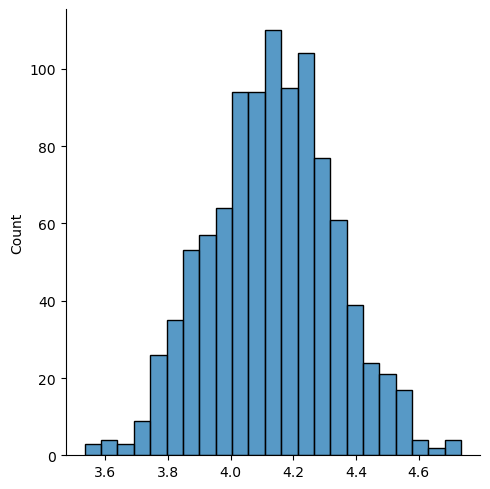

In [109]:
sns.displot(x=np.array(mu_hat_star_x))


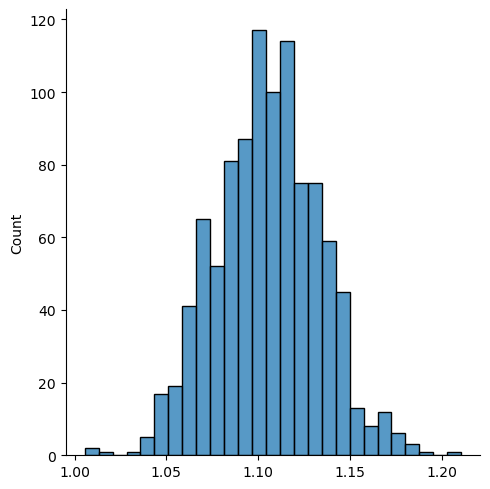

In [112]:
sns.displot(x=np.array(mu_hat_star_y))

In [113]:
[np.quantile(mu_hat_star_x, 0.025), np.quantile(mu_hat_star_x, 0.975)]

[3.756980482966336, 4.484084103205712]

In [114]:
[np.quantile(mu_hat_star_y, 0.025), np.quantile(mu_hat_star_y, 0.975)]

[1.0509997861809914, 1.161739238882596]

In [115]:
boot_x = IIDBootstrap(x, seed=111111)
boot_x.conf_int(np.mean, method='percentile', reps=10000, size=0.95)

array([[3.74242528],
       [4.52239214]])

In [116]:
np.corrcoef(x, y)

array([[1.        , 0.47948053],
       [0.47948053, 1.        ]])

In [118]:
def corr(x, y):
  corr_mat = np.corrcoef(x, y)
  return corr_mat[0, 1]

In [119]:
boot_xw = IIDBootstrap(x, y, seed=111111)
boot_xw.conf_int(corr, method='percentile', reps=10000, size=0.95)

array([[-0.18737329],
       [ 0.7668215 ]])

In [122]:
def mean_diff(x, y):
  return np.mean(x) - np.mean(y)

In [123]:
boot_xy = IndependentSamplesBootstrap(x, y, seed=111111)
boot_xy.conf_int(mean_diff, reps=10000, size=0.95, method='basic')

array([[2.64844326],
       [3.43622604]])